In [33]:
%matplotlib inline

In [34]:
import matplotlib.pyplot as plt

#### 1. 测试分布效果
##### 1.1 测试0-1000 的分布效果

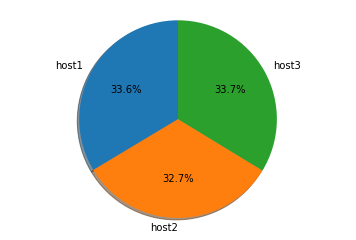

In [6]:
%run demo_jump.py

##### 1.2 测试0-1000 的分布效果

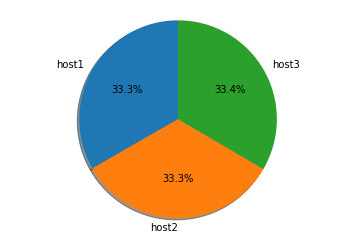

In [7]:
# 10000
%run demo_jump.py

#### 2.测试一致性

In [1]:
import jump
import binascii

In [19]:
hosts = [
    "host1",
    "host2",
    "host3",
]

In [20]:
# 正常情况
key_host = []
for i in range(3):
    host = jump.hash(binascii.crc32(b'/b/apk/Y29tLm1vYmlsZS5sZWdlbmRzXzExNTIxMzMxX2U4ZGIzOTM3') & 0xffffffff, len(hosts))
    key_host.append(host)
print("host:", key_host)

host: [2, 2, 2]


In [21]:
# host3 失联
print("del host3")
hosts = hosts[:2]
print("host:", hosts)
key_host = []
for i in range(3):
    host = jump.hash(binascii.crc32(b'/b/apk/Y29tLm1vYmlsZS5sZWdlbmRzXzExNTIxMzMxX2U4ZGIzOTM3') & 0xffffffff, len(hosts))
    key_host.append(host)
key_host

del host3
host: ['host1', 'host2']


[1, 1, 1]

In [24]:
# host3 重新链接
print("add host3")
hosts = [
    "host1",
    "host2",
    "host3",
]
print("host:", hosts)
key_host = []
for i in range(3):
    host = jump.hash(binascii.crc32(b'/b/apk/Y29tLm1vYmlsZS5sZWdlbmRzXzExNTIxMzMxX2U4ZGIzOTM3') & 0xffffffff, len(hosts))
    key_host.append(host)
key_host

add host3
host: ['host1', 'host2', 'host3']


[2, 2, 2]

#### 3. 测试转移分布

In [66]:
def show_pie(labels, sizes):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

In [69]:
def pie_host(hosts=[], nums=10):
    data_map = {}
    for i in range(nums):
        fid = bytes("/b/apk/Y29tLm1vYmlsZS5sZWdlbmRzXzExNTIxMzMxX2U4ZGIzOTM{:0>5}".format(i), encoding='utf-8')
        ret = jump.hash(binascii.crc32(fid) & 0xffffffff, len(hosts))
        key = hostMap.get("{}".format(ret), "default")
        data_map[key] = 1 + data_map.get(key, 0)

    labels = [key for key in data_map.keys()]
    sizes = [v for v in data_map.values()]
    show_pie(labels=labels, sizes=sizes)

In [64]:
hosts = [
    "host1",
    "host2",
    "host3",
    "host4",
    "host5",
    "host6",
    "host7",
    "host8",
    "host9",
    "host10",
]
hostMap = {"{}".format(i): hosts[i] for i in range(len(hosts))}

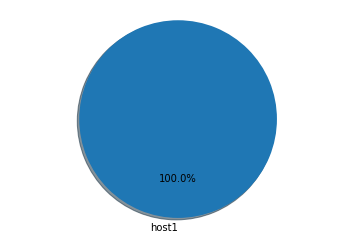

In [70]:
pie_host(hosts=hosts[:1], nums=1000)

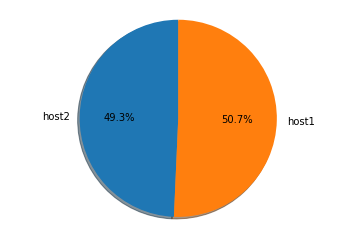

In [71]:
pie_host(hosts=hosts[:2], nums=1000)

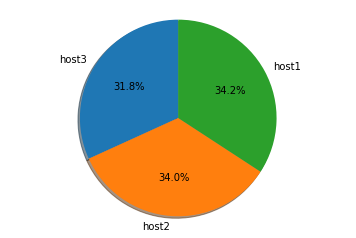

In [72]:
pie_host(hosts=hosts[:3], nums=1000)

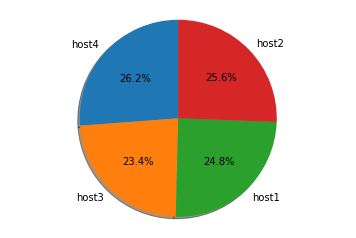

In [73]:
pie_host(hosts=hosts[:4], nums=1000)

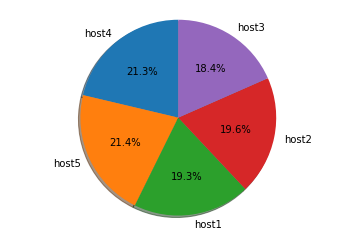

In [74]:
pie_host(hosts=hosts[:5], nums=1000)

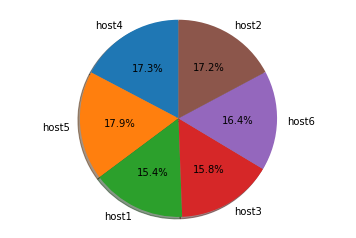

In [75]:
pie_host(hosts=hosts[:6], nums=1000)

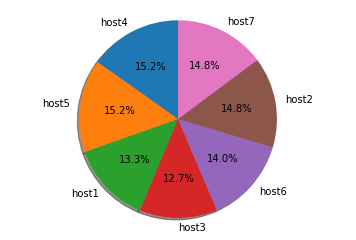

In [76]:
pie_host(hosts=hosts[:7], nums=1000)

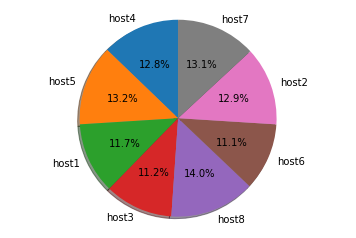

In [77]:
pie_host(hosts=hosts[:8], nums=1000)

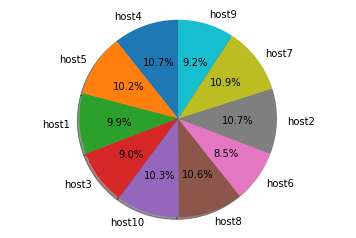

In [78]:
pie_host(hosts=hosts[:10], nums=1000)

#### 4. jump_hash 上线测试 

In [3]:
!date

2018年 1月23日 星期二 10时59分28秒 CST


{'d-04.winudf.com': 280646, 'd-03.winudf.com': 289672, 'd-01.winudf.com': 285941, 'd-02.winudf.com': 288248, 'd-05.winudf.com': 284904}
d-04.winudf.com 280646
d-03.winudf.com 289672
d-01.winudf.com 285941
d-02.winudf.com 288248
d-05.winudf.com 284904


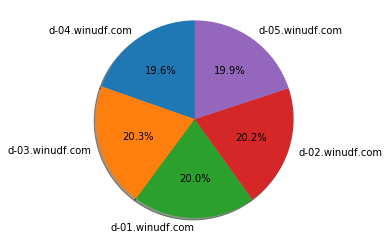

In [1]:
%run fsrouter.py

In [8]:
!date

2018年 1月23日 星期二 11时30分47秒 CST


{'d-04.winudf.com': 415470, 'd-03.winudf.com': 428363, 'd-01.winudf.com': 424689, 'd-02.winudf.com': 427979, 'd-05.winudf.com': 421990}
d-04.winudf.com 415470
d-03.winudf.com 428363
d-01.winudf.com 424689
d-02.winudf.com 427979
d-05.winudf.com 421990


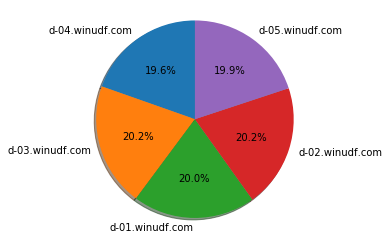

In [9]:
%run fsrouter.py

2018年 1月23日 星期二 13时57分04秒 CST
{'d-04.winudf.com': 1098344, 'd-03.winudf.com': 1129446, 'd-01.winudf.com': 1126197, 'd-02.winudf.com': 1133380, 'd-05.winudf.com': 1123419}
d-04.winudf.com 1098344
d-03.winudf.com 1129446
d-01.winudf.com 1126197
d-02.winudf.com 1133380
d-05.winudf.com 1123419


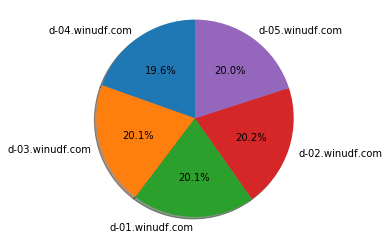

In [15]:
# 基本符合预期
!date
%run fsrouter.py

2018年 1月23日 星期二 15时30分16秒 CST
{'d-04.winudf.com': 1607712, 'd-03.winudf.com': 1652910, 'd-01.winudf.com': 1650370, 'd-02.winudf.com': 1668788, 'd-05.winudf.com': 1652993}
d-04.winudf.com 1607712
d-03.winudf.com 1652910
d-01.winudf.com 1650370
d-02.winudf.com 1668788
d-05.winudf.com 1652993


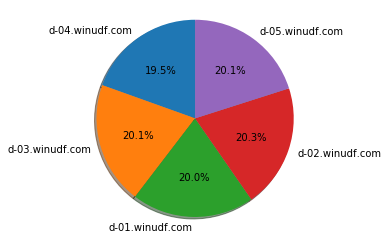

In [19]:
!date
%run fsrouter.py

2018年 1月23日 星期二 16时27分30秒 CST
{'d-04.winudf.com': 1951579, 'd-03.winudf.com': 2011104, 'd-01.winudf.com': 2004358, 'd-02.winudf.com': 2030940, 'd-05.winudf.com': 2011601}
d-04.winudf.com 1951579
d-03.winudf.com 2011104
d-01.winudf.com 2004358
d-02.winudf.com 2030940
d-05.winudf.com 2011601


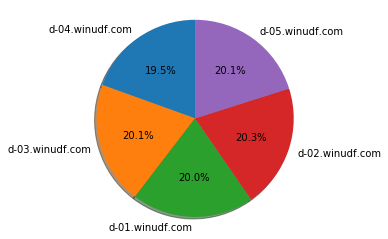

In [22]:
!date
%run fsrouter.py

2018年 1月23日 星期二 17时09分36秒 CST
{'d-04.winudf.com': 2225565, 'd-03.winudf.com': 2295583, 'd-01.winudf.com': 2284277, 'd-02.winudf.com': 2318895, 'd-05.winudf.com': 2298043}
d-04.winudf.com 2225565
d-03.winudf.com 2295583
d-01.winudf.com 2284277
d-02.winudf.com 2318895
d-05.winudf.com 2298043


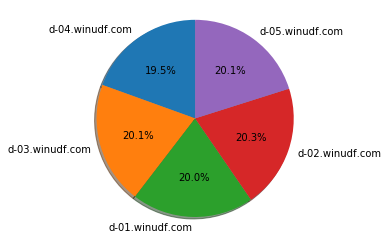

In [23]:
!date
%run fsrouter.py

2018年 1月23日 星期二 18时25分40秒 CST
{'d-04.winudf.com': 2750560, 'd-03.winudf.com': 2840821, 'd-01.winudf.com': 2818704, 'd-02.winudf.com': 2871068, 'd-05.winudf.com': 2842518}
d-04.winudf.com 2750560
d-03.winudf.com 2840821
d-01.winudf.com 2818704
d-02.winudf.com 2871068
d-05.winudf.com 2842518


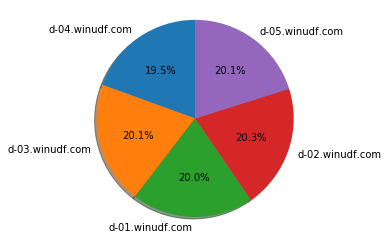

In [25]:
!date
%run fsrouter.py

2018年 1月24日 星期三 09时42分23秒 CST
{'d-04.winudf.com': 9314168, 'd-02.winudf.com': 9688319, 'd-05.winudf.com': 9614621, 'd-01.winudf.com': 9544982, 'd-03.winudf.com': 9650963}
d-04.winudf.com 9314168
d-02.winudf.com 9688319
d-05.winudf.com 9614621
d-01.winudf.com 9544982
d-03.winudf.com 9650963


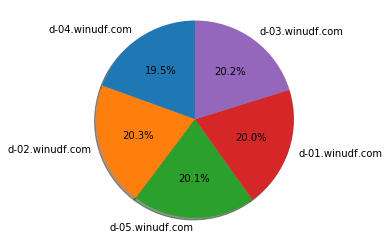

In [1]:
!date
%run fsrouter.py

2018年 1月24日 星期三 12时21分05秒 CST
{'d-04.winudf.com': 280575, 'd-02.winudf.com': 293685, 'd-05.winudf.com': 292278, 'd-01.winudf.com': 292633, 'd-03.winudf.com': 299857}
d-04.winudf.com 280575
d-02.winudf.com 293685
d-05.winudf.com 292278
d-01.winudf.com 292633
d-03.winudf.com 299857


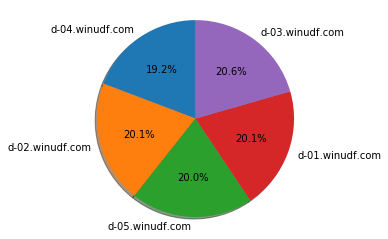

In [11]:
# 修改replicate->280->100, cachelen=90
# 预期：hotfile 命中下降， 一致性不受影响.
!date
%run fsrouter.py

2018年 1月24日 星期三 13时52分17秒 CST
{'d-03.winudf.com': 764607, 'd-02.winudf.com': 757062, 'd-05.winudf.com': 746748, 'd-04.winudf.com': 719278, 'd-01.winudf.com': 747970}
d-03.winudf.com 764607
d-02.winudf.com 757062
d-05.winudf.com 746748
d-04.winudf.com 719278
d-01.winudf.com 747970


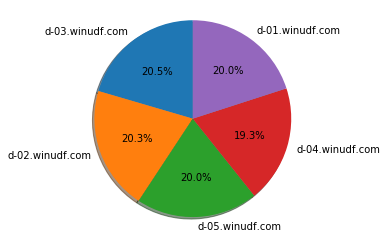

In [1]:
!date
%run fsrouter.py

2018年 1月24日 星期三 15时31分07秒 CST
{'d-03.winudf.com': 1331231, 'd-02.winudf.com': 1325674, 'd-05.winudf.com': 1308165, 'd-04.winudf.com': 1262620, 'd-01.winudf.com': 1308056}
d-03.winudf.com 1331231
d-02.winudf.com 1325674
d-05.winudf.com 1308165
d-04.winudf.com 1262620
d-01.winudf.com 1308056


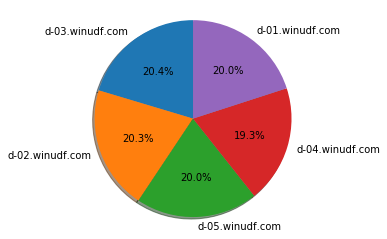

In [2]:
!date
%run fsrouter.py

2018年 1月24日 星期三 21时43分53秒 CST
{'d-01.winudf.com': 4137199, 'd-02.winudf.com': 4207380, 'd-03.winudf.com': 4192473, 'd-04.winudf.com': 4030353, 'd-05.winudf.com': 4141232}
d-01.winudf.com 4137199
d-02.winudf.com 4207380
d-03.winudf.com 4192473
d-04.winudf.com 4030353
d-05.winudf.com 4141232


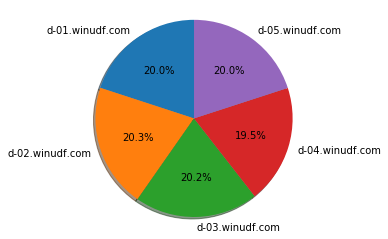

In [ ]:
!date
%run fsrouter.py

2018年 1月25日 星期四 15时50分28秒 CST
{'d-05.winudf.com': 11009028, 'd-03.winudf.com': 11178132, 'd-04.winudf.com': 10764713, 'd-01.winudf.com': 11031305, 'd-02.winudf.com': 11150590}
d-05.winudf.com 11009028
d-03.winudf.com 11178132
d-04.winudf.com 10764713
d-01.winudf.com 11031305
d-02.winudf.com 11150590


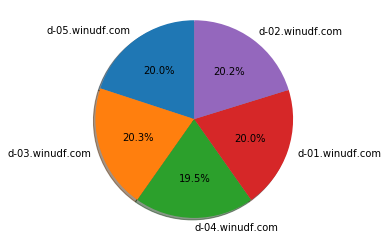

In [1]:
!date
%run fsrouter.py

In [ ]:
!date
%run fsrouter.py